In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data-test-analytics.csv')
df.head()

,id,created_at,updated_at,deleted_at,name_hash,email_hash,address_hash,birth_date,status,version,city,state,neighborhood,last_date_purchase,average_ticket,items_quantity,all_revenue,all_orders,recency,marketing_source
0,8bf7960e-3b93-468b-856e-6c6c5b56f52b,08/15/17 07:05 AM,01/14/21 11:23 AM,NaN,312d206168a318614897e8ccac43bff9,83eb3aed9a44377df80ce876dce92c9a,8b4bfaa0cbc41a16f46da15ddcd6a907,07/10/74 12:00 AM,active,2.31.7,Peixoto da Praia,AM,Aparecida 7ª Seção,01/14/21 11:23 AM,151.142942,10,906.857651,6,35,crm
1,a39535b5-4647-4680-b4f6-3aed57c1f1ff,12/31/19 09:53 PM,01/08/21 11:23 AM,NaN,de448fcb47d0d6a873b2eef52b5ee595,72678bb35e2ac84ed373e81dd9dca28c,22f1cfa1847f38da3f3cb114dd2b9247,07/06/40 12:00 AM,paused,3.30.12,Fernandes,RR,Santa Isabel,01/08/21 11:23 AM,236.991790,4,236.991790,1,41,organic_search
2,dc067cd2-c021-42bd-8c0e-beb267280e66,03/07/19 11:46 PM,01/07/21 11:23 AM,NaN,cb09e447ddc38283373d56bb46498e6a,668f4ee9add29c7bd02c485f1b7509e3,6cb47446a086ee6483b3eb954f11467a,03/18/63 12:00 AM,active,3.28.9,Lopes,RR,Estrela,01/07/21 11:23 AM,211.955597,13,2331.511572,11,42,organic_search
3,b5e4caeb-3a9b-49ed-aa33-5acd06b162c1,07/21/18 10:17 AM,01/10/21 11:23 AM,NaN,52593437a405b11b3557170680ef80c8,d3fb45188d95c8d7cc49da5b4f727c86,0a6f0c54db1e6f19347f96b50f8092a4,11/21/80 12:00 AM,active,3.34.3,Campos do Campo,PE,Confisco,01/10/21 11:23 AM,204.113227,8,1224.679359,6,39,organic_search
4,d4ff61fc-f008-4e19-b8ae-bd70cfa3ae27,06/08/18 12:09 PM,01/18/21 11:23 AM,NaN,dbda4b778a966c21904238ed2d2005db,a0f76bc49b4c43327b536da6e1a1465e,143b9f169b4fa1692f6d79b5682169b5,07/07/59 12:00 AM,active,3.19.8,das Neves,RJ,Vila Suzana Segunda Seção,01/18/21 11:23 AM,252.940997,9,2023.527980,8,31,crm


In [3]:
new_df = df.copy()

In [4]:
nasc = new_df.birth_date.str.split(' ', expand=True).get(0)


# definir uma função personalizada para formatar a data
def format_date(date_str):
    year = int(date_str.split('/')[-1])
    if year < 100:
        year += 1900
    return '{}/{}/{}'.format(date_str[:2], date_str[3:5], year)

# aplicar a função na coluna 'birth_date' para formatar a data corretamente
new_df['birth_date'] = nasc.apply(format_date)
datas = ['created_at', 'updated_at', 'birth_date', 'deleted_at', 'last_date_purchase']

for k, v in enumerate(datas):
    new_df[v] = pd.to_datetime(new_df[v])
new_df.head()

,id,created_at,updated_at,deleted_at,name_hash,email_hash,address_hash,birth_date,status,version,city,state,neighborhood,last_date_purchase,average_ticket,items_quantity,all_revenue,all_orders,recency,marketing_source
0,8bf7960e-3b93-468b-856e-6c6c5b56f52b,2017-08-15 07:05:00,2021-01-14 11:23:00,NaT,312d206168a318614897e8ccac43bff9,83eb3aed9a44377df80ce876dce92c9a,8b4bfaa0cbc41a16f46da15ddcd6a907,1974-07-10,active,2.31.7,Peixoto da Praia,AM,Aparecida 7ª Seção,2021-01-14 11:23:00,151.142942,10,906.857651,6,35,crm
1,a39535b5-4647-4680-b4f6-3aed57c1f1ff,2019-12-31 21:53:00,2021-01-08 11:23:00,NaT,de448fcb47d0d6a873b2eef52b5ee595,72678bb35e2ac84ed373e81dd9dca28c,22f1cfa1847f38da3f3cb114dd2b9247,1940-07-06,paused,3.30.12,Fernandes,RR,Santa Isabel,2021-01-08 11:23:00,236.991790,4,236.991790,1,41,organic_search
2,dc067cd2-c021-42bd-8c0e-beb267280e66,2019-03-07 23:46:00,2021-01-07 11:23:00,NaT,cb09e447ddc38283373d56bb46498e6a,668f4ee9add29c7bd02c485f1b7509e3,6cb47446a086ee6483b3eb954f11467a,1963-03-18,active,3.28.9,Lopes,RR,Estrela,2021-01-07 11:23:00,211.955597,13,2331.511572,11,42,organic_search
3,b5e4caeb-3a9b-49ed-aa33-5acd06b162c1,2018-07-21 10:17:00,2021-01-10 11:23:00,NaT,52593437a405b11b3557170680ef80c8,d3fb45188d95c8d7cc49da5b4f727c86,0a6f0c54db1e6f19347f96b50f8092a4,1980-11-21,active,3.34.3,Campos do Campo,PE,Confisco,2021-01-10 11:23:00,204.113227,8,1224.679359,6,39,organic_search
4,d4ff61fc-f008-4e19-b8ae-bd70cfa3ae27,2018-06-08 12:09:00,2021-01-18 11:23:00,NaT,dbda4b778a966c21904238ed2d2005db,a0f76bc49b4c43327b536da6e1a1465e,143b9f169b4fa1692f6d79b5682169b5,1959-07-07,active,3.19.8,das Neves,RJ,Vila Suzana Segunda Seção,2021-01-18 11:23:00,252.940997,9,2023.527980,8,31,crm


In [5]:
new_df.drop(['id', 'name_hash', 'email_hash', 'recency','address_hash'], axis=1, inplace=True)
new_df['time_lastbuy'] = (new_df['deleted_at'] - new_df['last_date_purchase']).dt.days
new_df['client_cancel_age'] = ((new_df['deleted_at'] - new_df['birth_date']).dt.days/365).round()
new_df['client_time'] = ((new_df['deleted_at'] - new_df['created_at']).dt.days/365)
new_df['year_cancel'] = new_df['deleted_at'].dt.year.astype(str).str.split('.',expand=True).get(0)
new_df.head()

,created_at,updated_at,deleted_at,birth_date,status,version,city,state,neighborhood,last_date_purchase,average_ticket,items_quantity,all_revenue,all_orders,marketing_source,time_lastbuy,client_cancel_age,client_time
0,2017-08-15 07:05:00,2021-01-14 11:23:00,NaT,1974-07-10,active,2.31.7,Peixoto da Praia,AM,Aparecida 7ª Seção,2021-01-14 11:23:00,151.142942,10,906.857651,6,crm,NaN,NaN,NaN
1,2019-12-31 21:53:00,2021-01-08 11:23:00,NaT,1940-07-06,paused,3.30.12,Fernandes,RR,Santa Isabel,2021-01-08 11:23:00,236.991790,4,236.991790,1,organic_search,NaN,NaN,NaN
2,2019-03-07 23:46:00,2021-01-07 11:23:00,NaT,1963-03-18,active,3.28.9,Lopes,RR,Estrela,2021-01-07 11:23:00,211.955597,13,2331.511572,11,organic_search,NaN,NaN,NaN
3,2018-07-21 10:17:00,2021-01-10 11:23:00,NaT,1980-11-21,active,3.34.3,Campos do Campo,PE,Confisco,2021-01-10 11:23:00,204.113227,8,1224.679359,6,organic_search,NaN,NaN,NaN
4,2018-06-08 12:09:00,2021-01-18 11:23:00,NaT,1959-07-07,active,3.19.8,das Neves,RJ,Vila Suzana Segunda Seção,2021-01-18 11:23:00,252.940997,9,2023.527980,8,crm,NaN,NaN,NaN


## Criando coluna de região para facilitar a compreensão geográfica do problema de negócios

In [6]:
# Dicionário de correspondência entre siglas e regiões
region_dict = {'AC': 'Norte', 'AL': 'Nordeste', 'AP': 'Norte', 'AM': 'Norte', 'BA': 'Nordeste',
               'CE': 'Nordeste', 'DF': 'Centro-Oeste', 'ES': 'Sudeste', 'GO': 'Centro-Oeste',
               'MA': 'Nordeste', 'MT': 'Centro-Oeste', 'MS': 'Centro-Oeste', 'MG': 'Sudeste',
               'PA': 'Norte', 'PB': 'Nordeste', 'PR': 'Sul', 'PE': 'Nordeste', 'PI': 'Nordeste',
               'RJ': 'Sudeste', 'RN': 'Nordeste', 'RS': 'Sul', 'RO': 'Norte', 'RR': 'Norte',
               'SC': 'Sul', 'SP': 'Sudeste', 'SE': 'Nordeste', 'TO': 'Norte'}

# Mapeia as siglas dos estados para as regiões do Brasil
new_df['region'] = new_df['state'].map(region_dict)

In [18]:
new_df['region'].value_counts()/len(new_df)*100

Nordeste        32.50
Norte           26.55
Centro-Oeste    15.02
Sudeste         14.56
Sul             11.37
Name: region, dtype: float64

In [9]:
## Criação de duas colunas: Uma que referencia mês e ano de cadastro do cliente, 
## e outra que referencia o mês e ano de cancelamento de cadastro (se houver)

new_df["month_year_cancel"] = new_df["deleted_at"].dt.strftime("%Y-%m")
new_df["month_year_sign"] = new_df["created_at"].dt.strftime("%Y-%m")


## O mesmo para trimestres
new_df['quarter_sign'] = new_df['created_at'].dt.year.astype(str).str.cat(new_df['created_at'].dt.quarter.astype(str), sep='-')
new_df['quarter_cancel'] = new_df['deleted_at'].dt.year.astype(str).str.cat(new_df['deleted_at'].dt.quarter.astype(str), sep='-')
new_df['quarter_cancel'] = new_df['quarter_cancel'].replace('nan-nan', None)

In [12]:
churn_table = pd.read_csv('churn_table.csv', index_col='Unnamed: 0')
churn_table[(churn_table['month-year']>='2016-11')&
            (churn_table['month-year']<'2019-11')].describe()

,cancelados,base_inicio,churn %
count,36.000000,36.000000,36.000000
mean,5.055556,4288.944444,0.109305
std,3.455385,1713.530623,0.053717
min,0.000000,1450.000000,0.000000
25%,2.750000,2855.500000,0.072070
50%,4.000000,4287.000000,0.120480
75%,7.250000,5708.000000,0.154665
max,12.000000,7114.000000,0.183517


## Gráfico indicativo do percentual de churns por mês ao longo do tempo

A partir de Novembro de 2016 quando os números começaram a ficar mais estáveis, até Novembro de 2019, a mediana de churns se concentrou em torno de 0.12%. A partir dessa data, os números começaram a inflar cada vez mais, chegando ao pico de 0.40% aproximadamente em Dezembro de 2020.

Vale lembrar que isso acontecia enquanto o número de clientes ativos em cada início de mês vinha crescendo linearmente desde o começo dos registros.

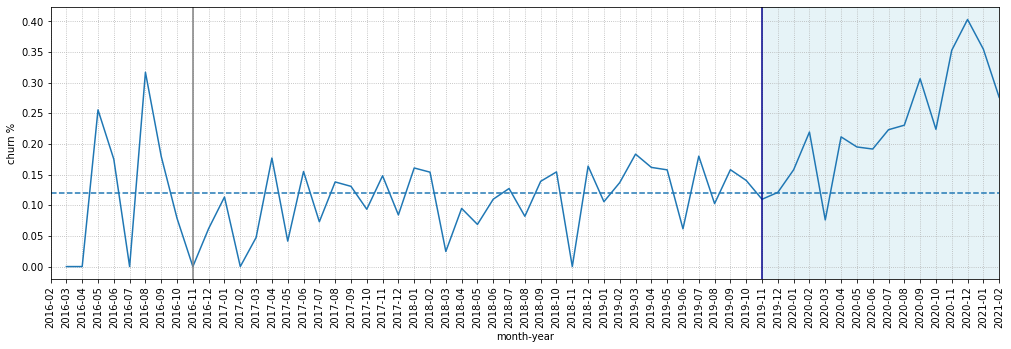

In [13]:
plt.figure(figsize=(17,5))
sns.lineplot(x='month-year', y='churn %',
             data=churn_table)

plt.axhline(0.12, linestyle='--')


plt.axvline('2016-11', color='gray')
plt.axvline('2019-11', color='darkblue')
plt.axvspan('2019-11', '2021-02', alpha=0.3, color='lightblue')

plt.xlim('2016-02', '2021-02')
plt.xticks(rotation=90)
plt.grid(linestyle=':');

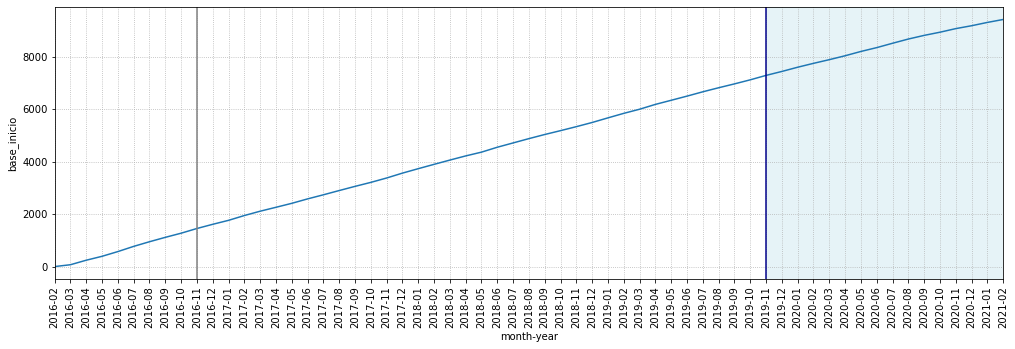

In [15]:
plt.figure(figsize=(17,5))
sns.lineplot(x='month-year', y='base_inicio',
             data=churn_table)

plt.axvline('2016-11', color='gray')
plt.axvline('2019-11', color='darkblue')
plt.axvspan('2019-11', '2021-02', alpha=0.3, color='lightblue')

plt.xlim('2016-02', '2021-02')
plt.xticks(rotation=90)
plt.grid(linestyle=':');

## Gráfico indicativo do número de cadastros por mês ao longo do tempo

- A partir de Agosto de 2020, o número de novos cadastros permaneceu majoritariamente abaixo de 160

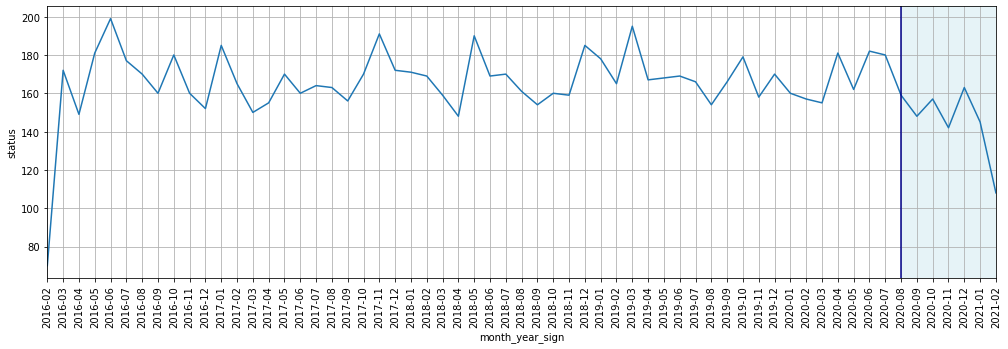

In [392]:
plt.figure(figsize=(17,5))
sns.lineplot(x='month_year_sign', y='status',
             data=new_df.groupby(['month_year_sign']).count().reset_index())

plt.axvline('2020-08', color='darkblue')
plt.axvspan('2020-08', '2021-02', alpha=0.3, color='lightblue')

plt.xlim('2016-02', '2021-02')
plt.xticks(rotation=90)
plt.grid();

### Observando os dados de maneira trimestral, é possivel notar que após o 2º trimestre de 2020 o número de novos cadastros vem caindo

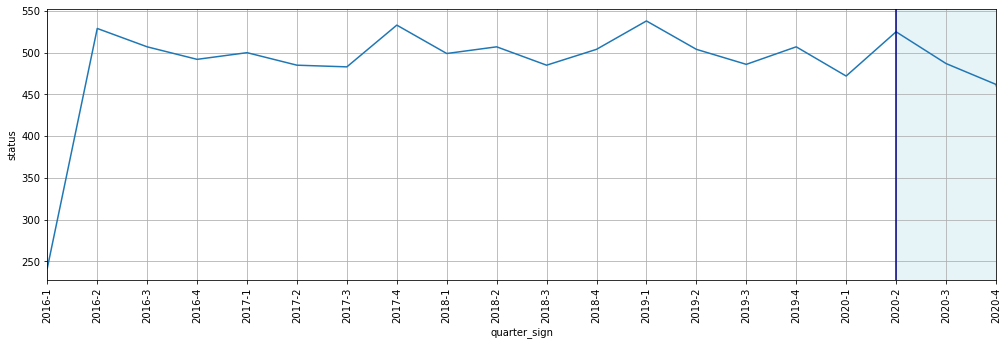

In [393]:
plt.figure(figsize=(17,5))
sns.lineplot(x='quarter_sign', y='status',
             data=new_df.groupby(['quarter_sign']).count().reset_index())

plt.axvline('2020-2', color='darkblue')
plt.axvspan('2020-2', '2020-5', alpha=0.3, color='lightblue')

plt.xlim('2016-1', '2020-4')
plt.xticks(rotation=90)
plt.grid();

## Gráfico indicativo do número de cadastros por mês ao longo do tempo separado por região geográfica

* Norte e Nordeste são as regiões em que mais se concentram novas assinaturas
* Relacionando com o gráfico geral de novos cadastros, é possível observar que a região Nordeste teve picos e vales extremos a partir de Agosto de 2020
* A região Sul deve o seur maior vale em Outubro de 2020, ficando abaixo de 10 cadastros pela primeira vez

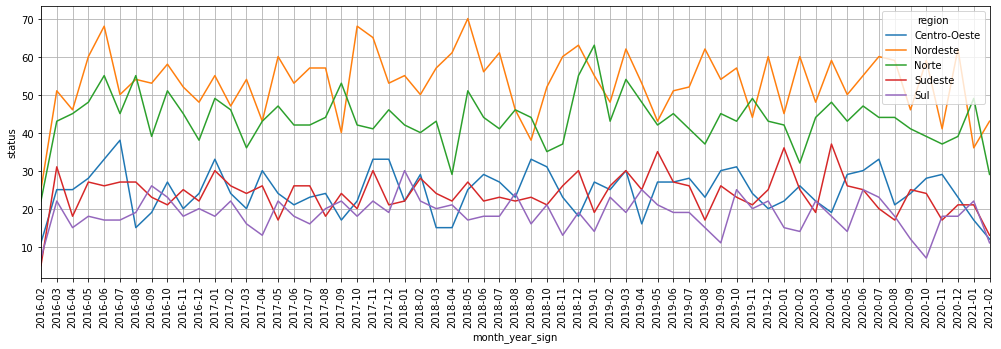

In [394]:
plt.figure(figsize=(17,5))
sns.lineplot(x='month_year_sign', y='status', hue='region',
             data=new_df.groupby(['month_year_sign', 'region']).count().reset_index())
plt.xlim('2016-02', '2021-02')
plt.xticks(rotation=90)
plt.grid();

### Observando os dados de maneira trimestral, é possível notar que após o 2º trimestre o número de cadastros na região Norte vem caindo, sendo o 4º trimestre aquele que registrou o menor numero de cadastros em todo o periodo observado

* A região Sul também registrou a mesma tendência de queda, com o 4º semestre de 2020 sendo o periodo com o menor número cadastros em todo o histórico
* A região Nordeste registrou que no 4º semestre de 2020 em relação ao 3º semestre do mesmo ano

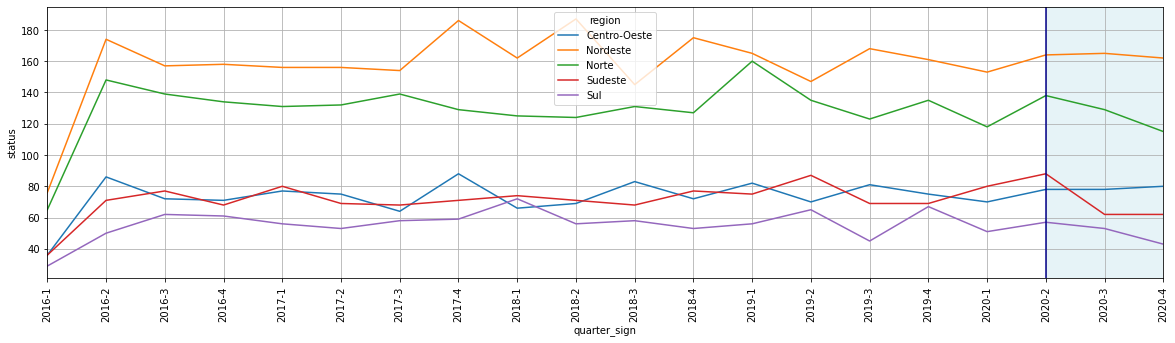

In [395]:
plt.figure(figsize=(20,5))
sns.lineplot(x='quarter_sign', y='status', hue='region',
             data=new_df.groupby(['quarter_sign', 'region']).count().reset_index())

plt.axvline('2020-2', color='darkblue')
plt.axvspan('2020-2', '2020-5', alpha=0.3, color='lightblue')

plt.xlim('2016-1', '2020-4')
plt.xticks(rotation=90)

plt.grid();

## Gráfico indicativo do número de cadastros por mês ao longo do tempo se parado por canal em que o cadastro de assinatura foi realizado

Se destacam os canais que mais convertem assinaturas:
- Organic Search
- Direct

Os demais possuem ritmo semelhante ao longo do tempo observado

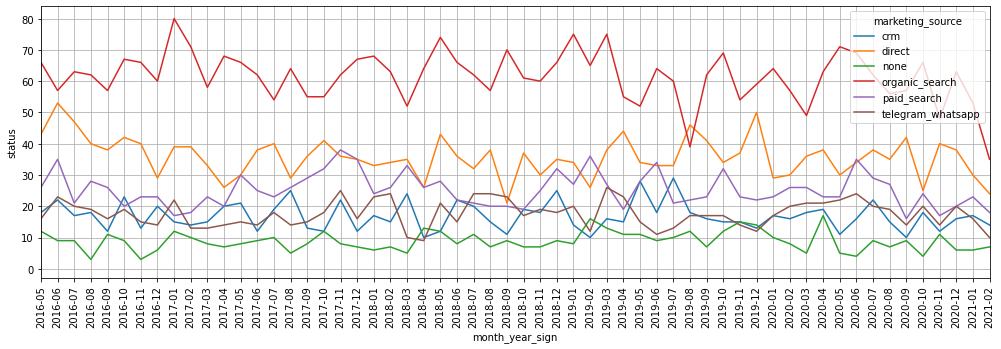

In [396]:
plt.figure(figsize=(17,5))
sns.lineplot(x='month_year_sign', y='status', hue='marketing_source',
             data=new_df.groupby(['month_year_sign', 'marketing_source']).count().reset_index())
plt.xlim('2016-05', '2021-02')
plt.xticks(rotation=90)
plt.grid();

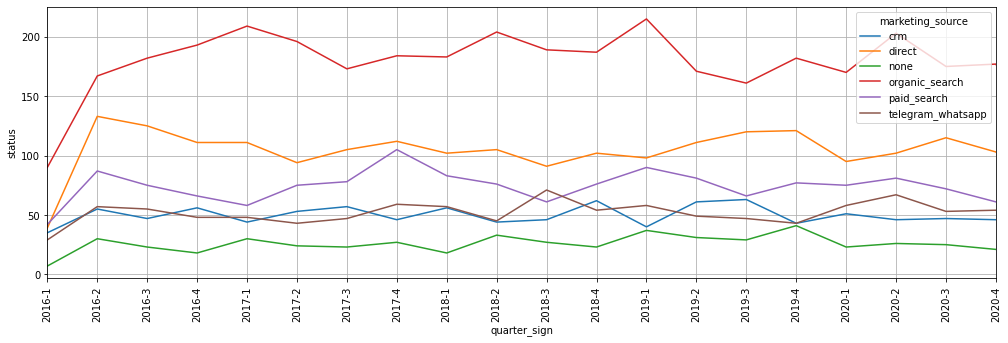

In [397]:
plt.figure(figsize=(17,5))
sns.lineplot(x='quarter_sign', y='status', hue='marketing_source',
             data=new_df.groupby(['quarter_sign', 'marketing_source']).count().reset_index())
plt.xlim('2016-1', '2020-4')
plt.xticks(rotation=90)
plt.grid();

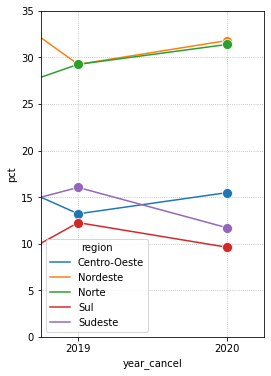

In [428]:
testando = new_df[(new_df['status'] == 'canceled') &
       (new_df['quarter_cancel'] < '2021.0-01.0')
       ].groupby('year_cancel')['region'].\
       value_counts().to_frame().rename(columns={'region': 'region_count'}).reset_index()

testando2 = testando.groupby(['year_cancel']).sum().reset_index()

testando3 = testando.merge(testando2, how='left', on='year_cancel')
testando3['pct'] = (testando3['region_count_x']/testando3['region_count_y'])*100

plt.figure(figsize=(4,6))
sns.lineplot(x='year_cancel',
            y='pct', hue='region',
            data=testando3, marker='o', markersize=10)

plt.xlim(2.75, 4.25)
plt.ylim(0,35)
plt.grid(linestyle=':');

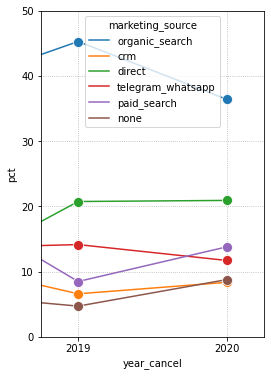

In [431]:
testando = new_df[(new_df['status'] == 'canceled') &
       (new_df['quarter_cancel'] < '2021.0-01.0')
       ].groupby('year_cancel')['marketing_source'].\
       value_counts().to_frame().rename(columns={'marketing_source': 'marketing_source_count'}).reset_index()


testando2 = testando.groupby(['year_cancel']).sum().reset_index()
testando3 = testando.merge(testando2, how='left', on='year_cancel')

testando3['pct'] = (testando3['marketing_source_count_x']/testando3['marketing_source_count_y'])*100
plt.figure(figsize=(4,6))
sns.lineplot(x='year_cancel',
            y='pct', hue='marketing_source',
            data=testando3, marker='o', markersize=10)

plt.xlim(2.75, 4.25)
plt.ylim(0,50)
plt.grid(linestyle=':');

## Gráfico indicativo do número de cancelamentos por mês ao longo do tempo

Apesar de o numero de novos cadastros terem se mantido constantes ao longo do tempo, seja por região ou por canal de conversão de assinatura, a partir de Agosto de 2018 o número de cancelamentos por mês teve um ligeiro aumento, com crescimento mais pronunciado a partir do período final do ano de 2019.

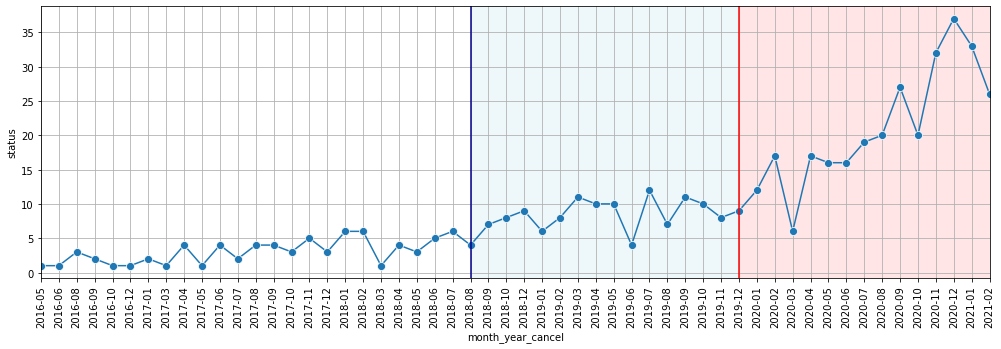

In [455]:
plt.figure(figsize=(17,5))
sns.lineplot(x='month_year_cancel', y='status', 
             data=new_df.groupby(['month_year_cancel']).count().reset_index(),
            marker='o', markersize=8)

plt.xlim('2016-05', '2021-02')
plt.xticks(rotation=90)

plt.axvline('2018-08', color='darkblue')
plt.axvline('2019-12', color='red')
plt.axvspan('2018-08', '2019-12', alpha=0.2, color='lightblue')
plt.axvspan('2019-12', '2021-02', alpha=0.1, color='red')

plt.grid();

### Analisando esses dados de maneira trimestral, é claro o crescimento do número absoluto de cancelamentos, sendo mais pronunciada a curva de crescimento a partir do 4º trimestre de 2019

Com as informações coletadas até aqui, é possível fazer algumas observações:
- Por volta do ano de 2019 algo já fazia com que os clientes cancelassem suas assinaturas com maior frequência
- Esse acontecimento teve maior impacto no ano de 2020, culminando num crescimento recorde do número de cancelamentos de mais de 80 no 4º semestre

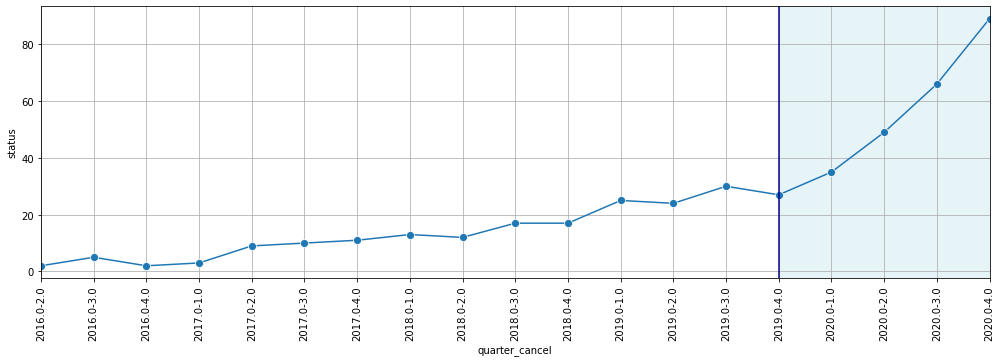

In [454]:
plt.figure(figsize=(17,5))
sns.lineplot(x='quarter_cancel', y='status', 
             data=new_df.groupby(['quarter_cancel']).count().reset_index(),
            marker='o', markersize=8)

plt.axvline('2019.0-4.0', color='darkblue')
plt.axvspan('2019.0-4.0', '2020.0-4.0', alpha=0.3, color='lightblue')

plt.xlim('2016.0-2.0', '2020.0-4.0')
plt.xticks(rotation=90)

plt.grid();

## Gráfico indicativo do número de cancelamentos por mês ao longo do tempo por região geográfica

A partir de Outubro de 2019 o número de cancelamentos por região em geral fica mais evidente, principalmente para as regiões Norte e Nordeste, essas que são as que lideram desde sempre o número de novos cadastros por mês.

É possível notar que o pico de cancelamento de ambas as regiões acontece em torno do final do ano de 2020.

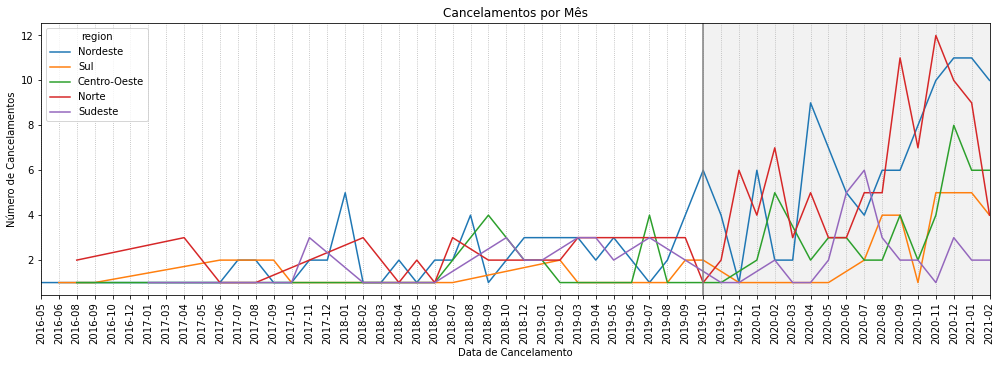

In [400]:
plt.figure(figsize=(17,5))
sns.lineplot(x='month_year_cancel', y='status', 
             hue='region', 
             data=new_df.groupby(['month_year_cancel', 'region']).count().reset_index())

plt.xlabel('Data de Cancelamento')
plt.ylabel('Número de Cancelamentos')
plt.xticks(rotation=90)
plt.xlim('2016-05', '2021-02')

plt.axvline('2019-10', color='gray')
plt.axvspan('2019-10', '2021-02', alpha=0.1, color='gray')


plt.title('Cancelamentos por Mês')

plt.grid(linestyle=':', axis='x');

### Analisando os mesmos dados, agora de maneira trimestral, é interessante observar que:

- O aumento no número de cancelamentos nas regiões Norte e Nordeste acompanham a mesma tendência do gráfico geral de cancelamentos, indicando que o comportamento das mesmas tenha grande peso na onda observada
- Da mesma forma que as regiões Norte e Nordeste se comportam de maneira similar, as regiões Centro-Oeste, Sul e Sudeste se comportam de maneira semelhante, indicando que os assinantes dessas regiões possam ter hábitos parecidos

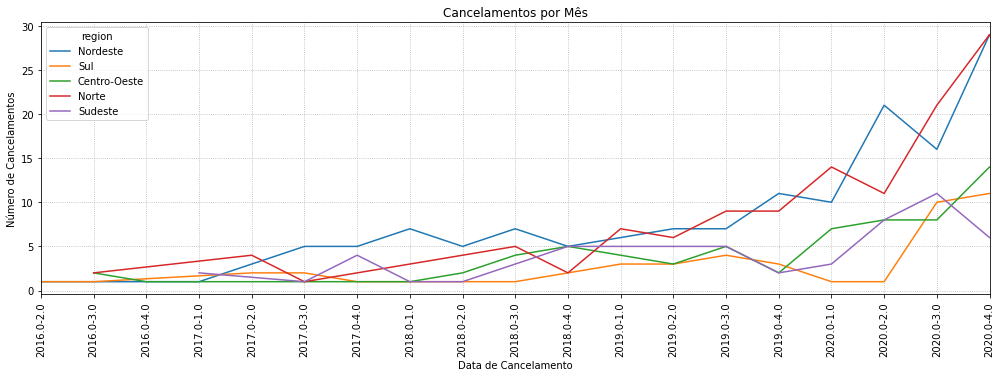

In [401]:
plt.figure(figsize=(17,5))
sns.lineplot(x='quarter_cancel', y='status', 
             hue='region', 
             data=new_df.groupby(['quarter_cancel', 'region']).count().reset_index())

plt.xlabel('Data de Cancelamento')
plt.ylabel('Número de Cancelamentos')
plt.xticks(rotation=90)
plt.xlim('2016.0-2.0', '2020.0-4.0')

#plt.axvline('2019-10', color='gray')
#plt.axvspan('2019-10', '2021-02', alpha=0.1, color='gray')


plt.title('Cancelamentos por Mês')

plt.grid(linestyle=':');

## Gráfico indicativo do número de cancelamentos por mês ao longo do tempo por região geográfica por canal em que o cadastro de assinatura foi realizado

A maior movimentação de cancelamentos acontece principalmente após Outubro de 2019, no canal de busca orgânica. O pico acontece na mesma época em que as maiores desistência de Norte e Nordeste ocorrem, final do ano de 2020. Vale salientar que o canal de Direct também é destacado nesse período.



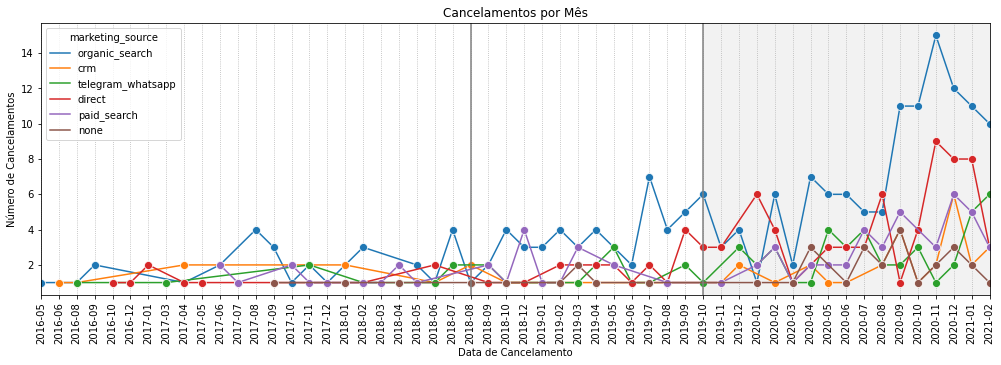

In [444]:
plt.figure(figsize=(17,5))
sns.lineplot(x='month_year_cancel', y='status', 
             hue='marketing_source', 
             data=new_df.groupby(['month_year_cancel', 'marketing_source']).count().reset_index(),
            marker='o', markersize=8)

plt.xlabel('Data de Cancelamento')
plt.ylabel('Número de Cancelamentos')
plt.xticks(rotation=90)
plt.xlim('2016-05', '2021-02')

plt.axvline('2018-08', color='gray')
plt.axvline('2019-10', color='gray')
plt.axvspan('2019-10', '2021-02', alpha=0.1, color='gray')

plt.title('Cancelamentos por Mês')

plt.grid(linestyle=':', axis='x');

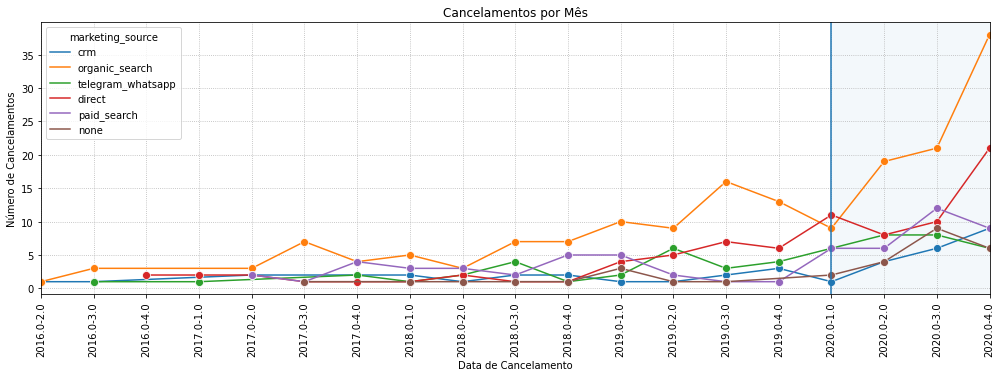

In [443]:
plt.figure(figsize=(17,5))
sns.lineplot(x='quarter_cancel', y='status', 
             hue='marketing_source', 
             data=new_df.groupby(['quarter_cancel', 'marketing_source']).count().reset_index(),
             marker='o', markersize=8)

plt.axvline('2020.0-1.0')
plt.axvspan('2020.0-1.0','2020.0-4.0', alpha=0.05)


plt.xlabel('Data de Cancelamento')
plt.ylabel('Número de Cancelamentos')
plt.xticks(rotation=90)
plt.xlim('2016.0-2.0', '2020.0-4.0')

plt.title('Cancelamentos por Mês')

plt.grid(linestyle=':');

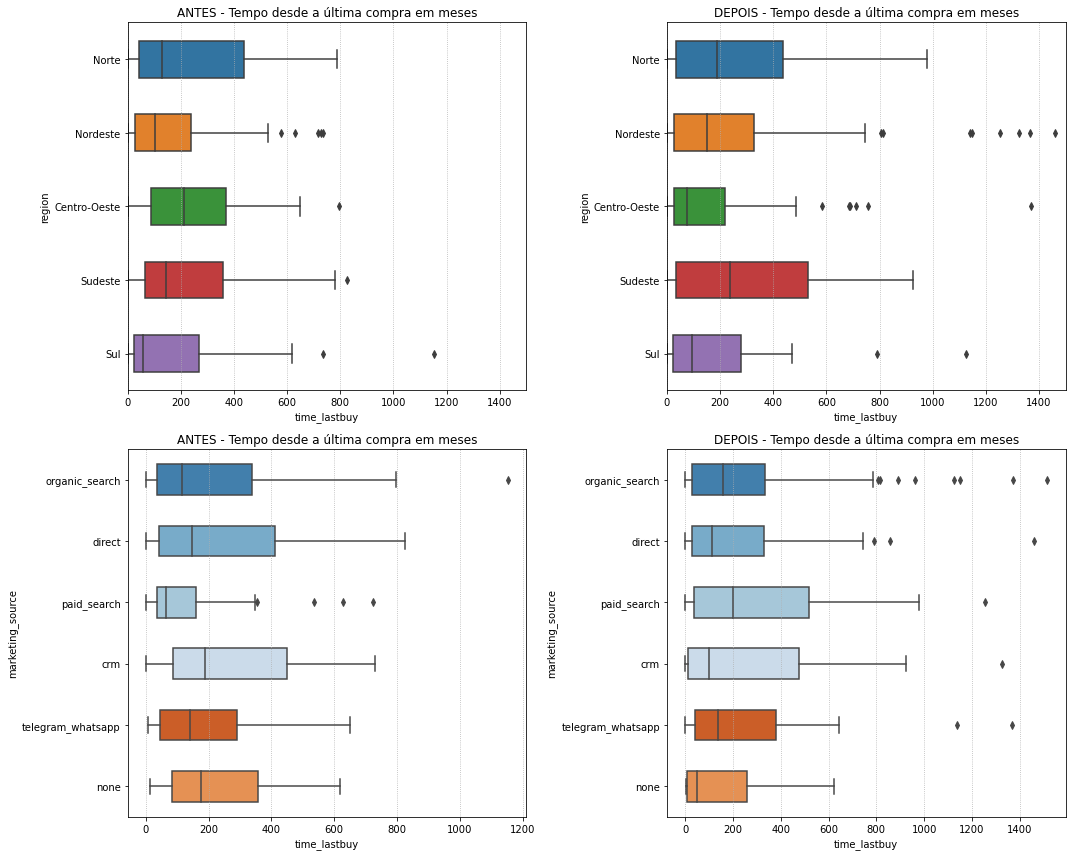

In [413]:
dados_antes = new_df[(new_df['status']=='canceled') &
                     (new_df['month_year_cancel'] <= '2019-12')]
dados_depois = new_df[(new_df['status']=='canceled') &
                      (new_df['month_year_cancel'] > '2019-12')]

fig, axs = plt.subplots(nrows=2,ncols=2, figsize=(15, 12))


sns.boxplot(x='time_lastbuy', y='region',data=dados_antes, width=0.5,
        order=['Norte', 'Nordeste', 'Centro-Oeste', 'Sudeste', 'Sul'], ax=axs[0,0])

axs[0,0].set_title('ANTES - Tempo desde a última compra em meses')
axs[0,0].set_xticks(np.arange(0,1500,200))
axs[0,0].set_xlim(0,1500)
axs[0,0].grid(linestyle=':', axis='x')


sns.boxplot(x='time_lastbuy', y='region',data=dados_depois, width=0.5,
           order=['Norte', 'Nordeste', 'Centro-Oeste', 'Sudeste', 'Sul'], ax=axs[0,1])

axs[0,1].set_title('DEPOIS - Tempo desde a última compra em meses')
axs[0,1].set_xticks(np.arange(0,1500,200))
axs[0,1].set_xlim(0,1500)
axs[0,1].grid(linestyle=':', axis='x')

sns.boxplot(x='time_lastbuy', y='marketing_source', data=dados_antes, width=0.5,
            order=['organic_search', 'direct', 'paid_search', 'crm', 'telegram_whatsapp', 'none'],
            ax=axs[1,0], palette='tab20c')
axs[1,0].set_title('ANTES - Tempo desde a última compra em meses')
axs[1,0].grid(linestyle=':', axis='x')


sns.boxplot(x='time_lastbuy', y='marketing_source', data=dados_depois, width=0.5,
            order=['organic_search', 'direct', 'paid_search', 'crm', 'telegram_whatsapp', 'none'],
            ax=axs[1,1], palette='tab20c')
axs[1,1].set_title('DEPOIS - Tempo desde a última compra em meses')
axs[1,1].grid(linestyle=':', axis='x')

plt.tight_layout()
plt.show()

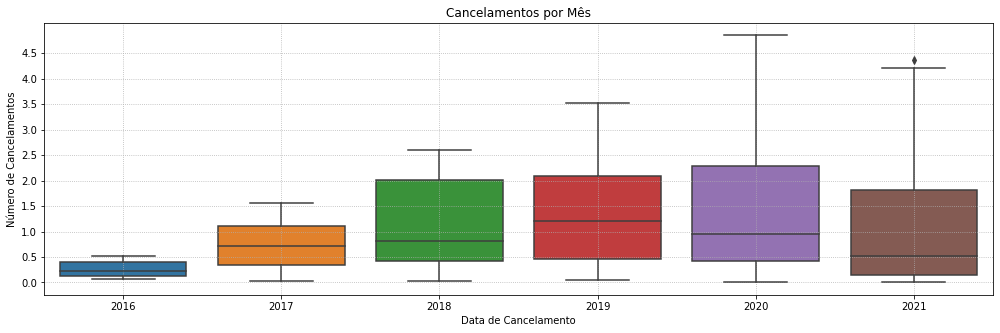

In [213]:
plt.figure(figsize=(17,5))
sns.boxplot(x='year_cancel', y='client_time', 
             #hue='marketing_source', 
             data=new_df.groupby(['year_cancel']).value_counts().reset_index())

plt.xlabel('Data de Cancelamento')
plt.ylabel('Número de Cancelamentos')
plt.yticks(np.arange(0,5,0.5))
#plt.xticks(rotation=90)
#plt.xlim('2016', '2030')

plt.title('Cancelamentos por Mês')

plt.grid(linestyle=':');

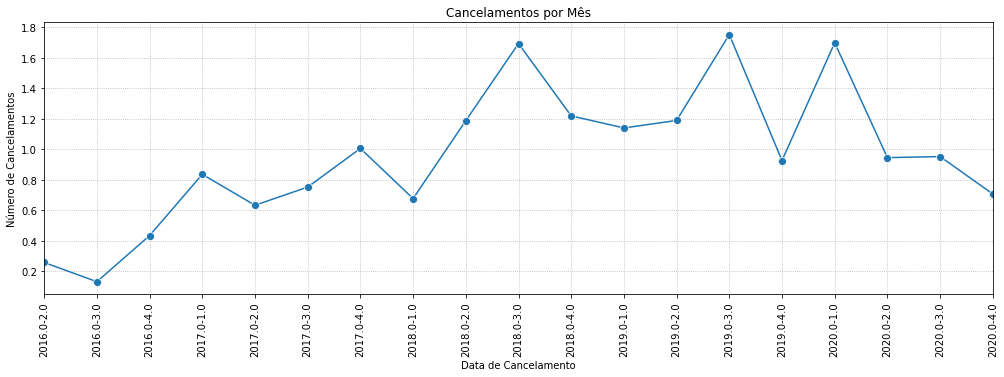

In [445]:
plt.figure(figsize=(17,5))
sns.lineplot(x='quarter_cancel', y='client_time', 
             #hue='marketing_source', 
             data=new_df.groupby(['quarter_cancel']).median().reset_index(),
            marker='o', markersize=8)

plt.xlabel('Data de Cancelamento')
plt.ylabel('Número de Cancelamentos')
plt.xticks(rotation=90)
plt.xlim('2016.0-2.0', '2020.0-4.0')

plt.title('Cancelamentos por Mês')

plt.grid(linestyle=':');

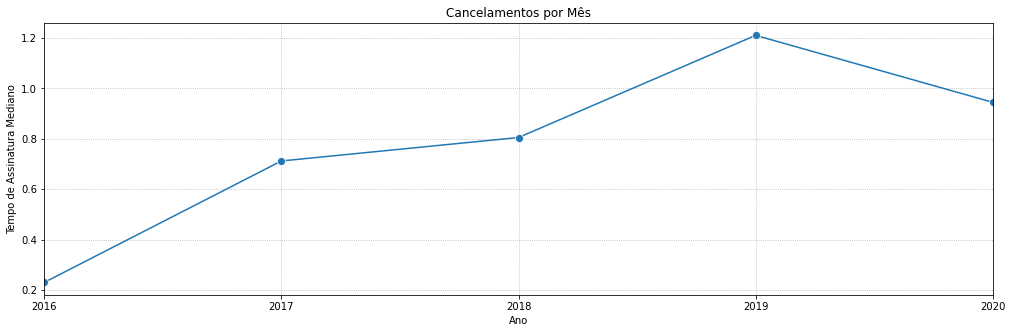

In [475]:
plt.figure(figsize=(17,5))
sns.lineplot(x='year_cancel', y='client_time', 
             #hue='marketing_source', 
             data=new_df[new_df['year_cancel']!='2021'].groupby(['year_cancel']).median().reset_index(),
            marker='o', markersize=8)

plt.xlabel('Ano')
plt.ylabel('Tempo de Assinatura Mediano')
#plt.xticks(rotation=90)
plt.xlim('2016', '2020')

plt.title('Cancelamentos por Mês')

plt.grid(linestyle=':');

<AxesSubplot:xlabel='quarter_sign', ylabel='created_at'>

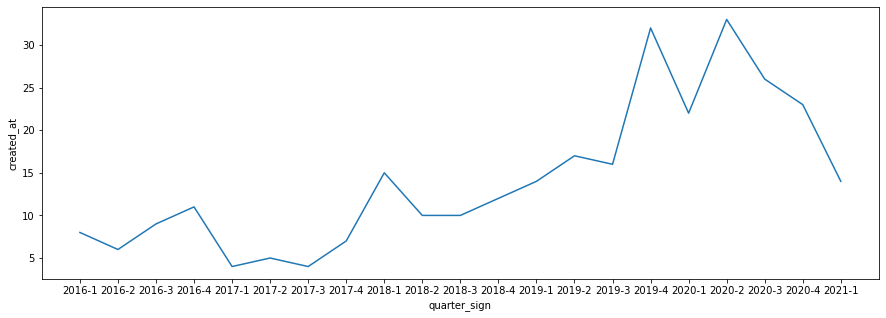

In [587]:
# Calculo para retornar quando os cancelamentos pós 2020 foram cadastrados
dados = new_df[(new_df['status']=='canceled') &
        (new_df['month_year_cancel'] > '2019-12')].\
        groupby('quarter_sign').\
        count().reset_index()[['quarter_sign','created_at']]

plt.figure(figsize=(15,5))
sns.lineplot(x='quarter_sign', y='created_at', data=dados)

In [590]:
dados.sort_values('created_at', ascending=False)

,quarter_sign,created_at
17,2020-2,33
15,2019-4,32
18,2020-3,26
19,2020-4,23
16,2020-1,22
13,2019-2,17
14,2019-3,16
8,2018-1,15
20,2021-1,14
12,2019-1,14


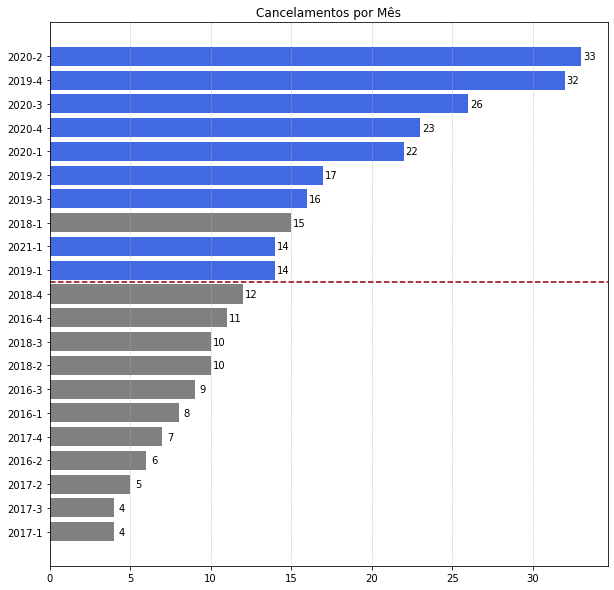

In [605]:
# Calculo para retornar quando os cancelamentos pós 2020 foram cadastrados
dados = new_df[(new_df['status']=='canceled') &
        (new_df['month_year_cancel'] > '2019-12')].\
        groupby('quarter_sign').\
        count().reset_index()[['quarter_sign','created_at']].sort_values('created_at', ascending=True)

color = ['royalblue' if v >= '2019-1' else 'gray' for v in dados.quarter_sign]

plt.figure(figsize=(10,10))
bars = plt.barh(dados.quarter_sign, dados.created_at, color=color)
for i, bar in enumerate(bars):
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height() / 2, 
             dados.created_at.iloc[i], ha='center', va='center')

#plt.axvline(12, color='darkred')
plt.axhline(10.5, color='darkred', linestyle='--')
plt.xticks(np.arange(0, 35, step=5))

plt.title('Cancelamentos por Mês')

plt.grid(linestyle=':', axis='x');

In [242]:
dados = new_df[(new_df['status']=='canceled') &
        (new_df['month_year_cancel'] > '2019-12') &
        (new_df['quarter_sign'] >= '2019-1')]

dados.shape

(197, 24)

In [244]:
dados = new_df[(new_df['status']=='canceled') &
        (new_df['month_year_cancel'] > '2019-12') &
        (new_df['quarter_sign'] < '2019-1')]

dados.shape

(101, 24)

In [311]:
dados = new_df[(new_df['status']=='canceled') &
        (new_df['month_year_cancel'] > '2019-12') &
        (new_df['quarter_sign'] < '2019-1')]

dados.describe()

,average_ticket,items_quantity,all_revenue,all_orders,time_lastbuy,client_cancel_age,client_time
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,217.147045,8.485149,1343.933542,6.178218,536.841584,53.504950,2.953967
std,20.492924,3.226806,759.281268,3.412905,352.174069,16.219509,0.930470
min,171.262054,3.000000,0.000000,0.000000,7.000000,25.000000,1.276712
25%,199.871154,6.000000,683.512841,3.000000,230.000000,41.000000,2.205479
50%,217.975211,8.000000,1384.626685,6.000000,511.000000,53.000000,2.873973
75%,231.567301,11.000000,1962.664507,9.000000,725.000000,68.000000,3.764384
max,265.709577,18.000000,2873.700656,11.000000,1516.000000,81.000000,4.852055


In [312]:
dados = new_df[(new_df['status']=='canceled') &
        (new_df['month_year_cancel'] > '2019-12') &
        (new_df['quarter_sign'] >= '2019-1')]

dados.describe()

,average_ticket,items_quantity,all_revenue,all_orders,time_lastbuy,client_cancel_age,client_time
count,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000
mean,217.871785,8.639594,926.860919,4.238579,108.030457,54.573604,0.582449
std,21.738073,2.713732,768.588071,3.475708,120.602480,16.094140,0.480800
min,151.804161,1.000000,0.000000,0.000000,0.000000,24.000000,0.000000
25%,202.668435,7.000000,218.456540,1.000000,16.000000,42.000000,0.161644
50%,218.456540,9.000000,866.874883,4.000000,57.000000,56.000000,0.476712
75%,231.366753,10.000000,1442.952756,7.000000,170.000000,69.000000,0.876712
max,266.449458,16.000000,2718.857410,11.000000,568.000000,80.000000,1.958904


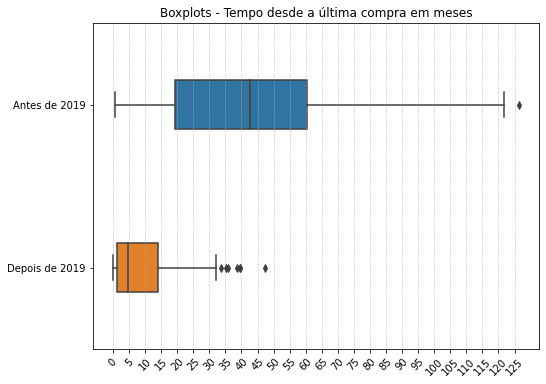

In [321]:
dados_antes = new_df[(new_df['status']=='canceled') &
                     (new_df['month_year_cancel'] > '2019-12') &
                     (new_df['quarter_sign'] < '2019-1')]

dados_depois = new_df[(new_df['status']=='canceled') &
                      (new_df['month_year_cancel'] > '2019-12') &
                      (new_df['quarter_sign'] >= '2019-1')]



plt.figure(figsize=(8,6))
sns.boxplot(data=[dados_antes['time_lastbuy']/12, 
                  dados_depois['time_lastbuy']/12],
                  orient='horizontal', width=0.3)

plt.yticks([0,1], ['Antes de 2019', 'Depois de 2019'])
plt.title('Boxplots - Tempo desde a última compra em meses')
plt.xticks(np.arange(0,130,5), rotation=45)
plt.grid(linestyle=':', axis='x')
plt.show()

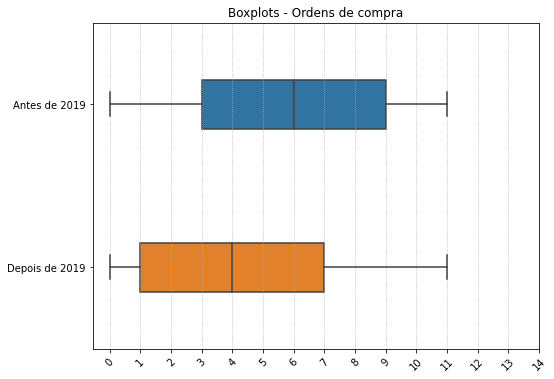

In [299]:
dados_antes = new_df[(new_df['status']=='canceled') &
                     (new_df['month_year_cancel'] > '2019-12') &
                     (new_df['quarter_sign'] < '2019-1')]

dados_depois = new_df[(new_df['status']=='canceled') &
                      (new_df['month_year_cancel'] > '2019-12') &
                      (new_df['quarter_sign'] >= '2019-1')]



plt.figure(figsize=(8,6))
sns.boxplot(data=[dados_antes['all_orders'], 
                  dados_depois['all_orders']],
                  orient='horizontal', width=0.3)

plt.yticks([0,1], ['Antes de 2019', 'Depois de 2019'])
plt.title('Boxplots - Ordens de compra')
plt.xticks(np.arange(0,15,1), rotation=45)
plt.grid(linestyle=':', axis='x')
plt.show()

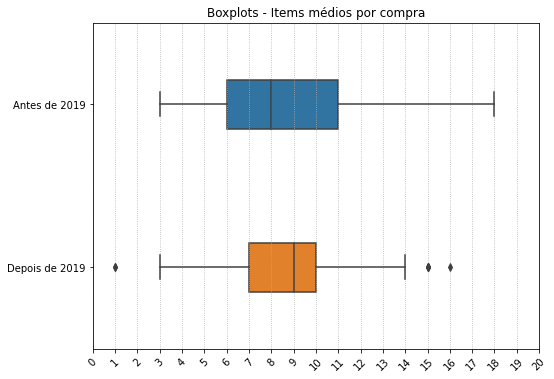

In [309]:
dados_antes = new_df[(new_df['status']=='canceled') &
                     (new_df['month_year_cancel'] > '2019-12') &
                     (new_df['quarter_sign'] < '2019-1')]

dados_depois = new_df[(new_df['status']=='canceled') &
                      (new_df['month_year_cancel'] > '2019-12') &
                      (new_df['quarter_sign'] >= '2019-1')]



plt.figure(figsize=(8,6))
sns.boxplot(data=[dados_antes['items_quantity'], 
                  dados_depois['items_quantity']],
                  orient='horizontal', width=0.3)

plt.yticks([0,1], ['Antes de 2019', 'Depois de 2019'])
plt.title('Boxplots - Items médios por compra')
plt.xticks(np.arange(0,21,1), rotation=45)
plt.grid(linestyle=':', axis='x')
plt.show()

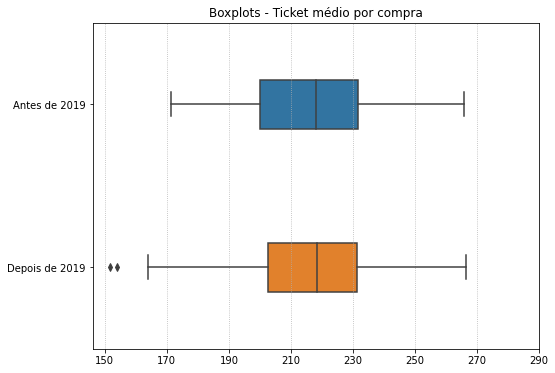

In [316]:
dados_antes = new_df[(new_df['status']=='canceled') &
                     (new_df['month_year_cancel'] > '2019-12') &
                     (new_df['quarter_sign'] < '2019-1')]

dados_depois = new_df[(new_df['status']=='canceled') &
                      (new_df['month_year_cancel'] > '2019-12') &
                      (new_df['quarter_sign'] >= '2019-1')]



plt.figure(figsize=(8,6))
sns.boxplot(data=[dados_antes['average_ticket'], 
                  dados_depois['average_ticket']],
                  orient='horizontal', width=0.3)

plt.yticks([0,1], ['Antes de 2019', 'Depois de 2019'])
plt.title('Boxplots - Ticket médio por compra')
plt.xticks(np.arange(150,300,20))
plt.grid(linestyle=':', axis='x')
plt.show()

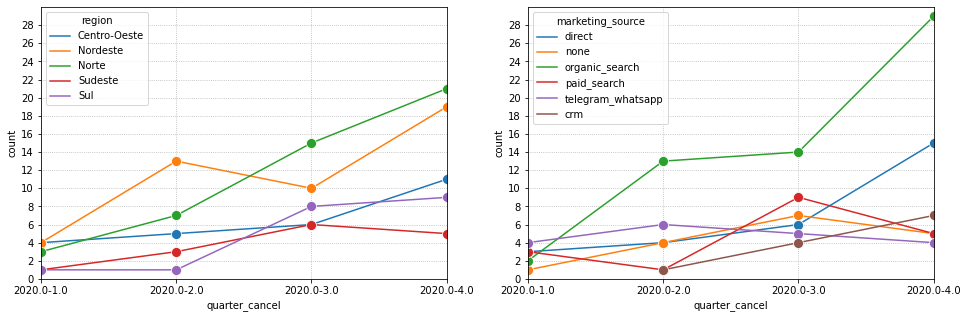

In [582]:
dados1 = new_df[(new_df['status']=='canceled') &
        (new_df['quarter_cancel'] > '2019.0-4.0') &
        (new_df['quarter_sign'] > '2018-4')].groupby(['quarter_cancel','region'])\
        [['region','quarter_cancel']].\
        value_counts().to_frame().rename(columns={0: 'count'}).reset_index()

dados2 = new_df[(new_df['status']=='canceled') &
        (new_df['quarter_cancel'] > '2019.0-4.0') &
        (new_df['quarter_sign'] > '2018-4')].groupby(['quarter_cancel','marketing_source'])\
        [['quarter_cancel', 'marketing_source']].\
        value_counts().to_frame().rename(columns={0: 'count'}).reset_index()

#plt.figure(figsize=(8,6))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,5))

sns.lineplot(x='quarter_cancel', y='count', hue='region',
             data=dados1, marker='o', markersize=10, ci=0, ax=ax[0])
sns.lineplot(x='quarter_cancel', y='count', hue='marketing_source',
             data=dados2, marker='o', markersize=10, ci=0, ax=ax[1])

for i, j in enumerate(ax):
    ax[i].set_xlim(0, 3)
    ax[i].set_ylim(0,30)
    ax[i].set_yticks(np.arange(0,30,2))
    ax[i].grid(linestyle=':')